In [6]:
import urllib.request

url = "http://example.com"
timeout_seconds = 20  # Set timeout to 20 seconds
response = urllib.request.urlopen(url, timeout=timeout_seconds)


In [10]:
import ssl
import urllib.request

# Disabling SSL certificate verification (not recommended)
ssl._create_default_https_context = ssl._create_unverified_context

url = "https://example.com"
response = urllib.request.urlopen(url)
print(response.read())


b'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    

In [14]:
# stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gavad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
set_stopwords = set(stopwords.words('english'))

In [16]:
set_stopwords_xnot=[item for item in set_stopwords if item not in ['no','not'] ]

In [17]:
# util func to convert stringified list to list
def to_list(strg_list):
  return strg_list.strip("[]").replace("'","").replace('"',"").replace(",","").split() 

In [18]:
#suppress matplotlib warning messages
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [20]:
import pandas as pd

# Example DataFrame initialization (replace with your actual data)
data = {'posttoken': [['example', 'data', 'for', 'testing'],
                      ['another', 'set', 'of', 'tokens']]}
df = pd.DataFrame(data)

# Create unigrams
df['unigram'] = [[item for item in strg_list] for strg_list in df['posttoken']]

# Define stopwords set (example using NLTK)
from nltk.corpus import stopwords
set_stopwords = set(stopwords.words('english'))

# Create filtered unigrams
df['unigramf'] = [[item for item in list_item if item not in set_stopwords] for list_item in df['unigram']]

print(df[['posttoken', 'unigram', 'unigramf']].head())


                       posttoken                        unigram  \
0  [example, data, for, testing]  [example, data, for, testing]   
1     [another, set, of, tokens]     [another, set, of, tokens]   

                   unigramf  
0  [example, data, testing]  
1    [another, set, tokens]  


In [22]:
from collections import Counter
from operator import itemgetter

# Assuming 'df' and 'unigramf' have already been created as in the previous steps
count_1gramf = Counter([item for list_item in df['unigramf'] for item in list_item])

# Print the length of the counter (number of unique tokens)
print(len(count_1gramf))

# Print the top 100 most frequent tokens
print(sorted(list(count_1gramf.items()), key=itemgetter(1), reverse=True)[0:100])


6
[('example', 1), ('data', 1), ('testing', 1), ('another', 1), ('set', 1), ('tokens', 1)]


In [24]:
import nltk

# Create bigrams directly from the 'posttoken' lists
df['bigram'] = [list(nltk.bigrams(strg_list)) for strg_list in df['posttoken']]

# Assuming you have a set of stopwords defined
set_stopwords_xnot = set(stopwords.words('english'))

# Create filtered bigrams
df['bigramf'] = [[x for x in list_item if not any(y in x for y in set_stopwords_xnot)] for list_item in df['bigram']]

# Display the bigrams and filtered bigrams
print(df[['bigram', 'bigramf']].head())


                                           bigram            bigramf
0  [(example, data), (data, for), (for, testing)]  [(example, data)]
1       [(another, set), (set, of), (of, tokens)]   [(another, set)]


In [25]:
# create bigram counter
from collections import Counter
from nltk.lm.preprocessing import flatten
import operator
count_2gram= Counter(list(flatten([list_item for list_item in df['bigram']])))
print(len(count_2gram))
print(count_2gram)
count_2gramf= Counter (flatten(list_item for list_item in df['bigramf']))
print(len(count_2gramf))
print(sorted(list(count_2gramf.items()),key=operator.itemgetter(1),reverse=True)[0:100])
#output
#...
#29296
#[(('ed', 'miliband'), 829), (('david', 'cameron'), 529), (('nigel', 'farage'), 502),...

6
Counter({('example', 'data'): 1, ('data', 'for'): 1, ('for', 'testing'): 1, ('another', 'set'): 1, ('set', 'of'): 1, ('of', 'tokens'): 1})
2
[(('example', 'data'), 1), (('another', 'set'), 1)]


In [27]:
import nltk
from collections import Counter

# Create trigrams directly from the 'posttoken' lists
df['trigram'] = [list(nltk.trigrams(strg_list)) for strg_list in df['posttoken']]

# Assuming you have a set of stopwords defined
set_stopwords_xnot = set(stopwords.words('english'))

# Create filtered trigrams
df['trigramf'] = [[x for x in list_item if not any(y in x for y in set_stopwords_xnot)] for list_item in df['trigram']]

# Display the trigrams and filtered trigrams
print(df[['trigram', 'trigramf']].head())


                                        trigram trigramf
0  [(example, data, for), (data, for, testing)]       []
1       [(another, set, of), (set, of, tokens)]       []


In [28]:
# create trigram counter
from collections import Counter
from nltk.lm.preprocessing import flatten
from operator import itemgetter
count_3gram= Counter(list(flatten([list_item for list_item in df['trigram']])))
print(len(count_3gram))
print(list(count_3gram.items())[0:100])
count_3gramf= Counter (flatten(list_item for list_item in df['trigramf']))
print(len(count_3gramf))
print(sorted(list(count_3gramf.items()),key=itemgetter(1),reverse=True)[0:100])
# output
#19859
#[(('david', 'cameron', 'win'), 67), (('ukip', 'ukip', 'ukip'), 58),...

4
[(('example', 'data', 'for'), 1), (('data', 'for', 'testing'), 1), (('another', 'set', 'of'), 1), (('set', 'of', 'tokens'), 1)]
0
[]


In [30]:
import nltk
from nltk.util import ngrams
from collections import Counter

# Create n-grams directly from the 'posttoken' lists
df['ngram'] = [list(ngrams(strg_list, 4)) for strg_list in df['posttoken']]

# Assuming you have a set of stopwords defined
set_stopwords_xnot = set(stopwords.words('english'))

# Create filtered n-grams
df['ngramf'] = [[x for x in list_item if not any(y in x for y in set_stopwords_xnot)] for list_item in df['ngram']]

# Display the n-grams and filtered n-grams
print(df[['ngram', 'ngramf']].head())


                             ngram ngramf
0  [(example, data, for, testing)]     []
1     [(another, set, of, tokens)]     []


In [31]:
# create ngram counter
from collections import Counter
from nltk.lm.preprocessing import flatten
from operator import itemgetter
count_ngram= Counter(list(flatten([list_item for list_item in df['ngram']])))
print(len(count_ngram))
print(list(count_ngram.items())[0:100])
count_ngramf= Counter (flatten(list_item for list_item in df['ngramf']))
print(len(count_ngramf))
print(sorted(list(count_ngramf.items()),key=itemgetter(1),reverse=True)[0:100])
#output
#...
#10825
#[(('ukip', 'ukip', 'ukip', 'ukip'), 53), (('ukip', 'would', 'accept', 'eu'), 52),...

2
[(('example', 'data', 'for', 'testing'), 1), (('another', 'set', 'of', 'tokens'), 1)]
0
[]


In [32]:
# create df['evgram']
import nltk
from nltk.util import everygrams
#create list from ngram generator
df['evgram']=[list(everygrams(item, min_len=1, max_len=3)) for item in df['unigram']]
df['evgramf']=[[x for x in list_item if not any(y for y in set_stopwords_xnot if y in x) ] for list_item in df['evgram']]
df[['evgram','evgramf']][0:5]

,evgram,evgramf
0,"[(example,), (data,), (for,), (testing,), (example, data), (data, for), (for, testing), (example, data, for), (data, for, testing)]","[(example,), (data,), (testing,), (example, data)]"
1,"[(another,), (set,), (of,), (tokens,), (another, set), (set, of), (of, tokens), (another, set, of), (set, of, tokens)]","[(another,), (set,), (tokens,), (another, set)]"


In [33]:
import nltk
from nltk.util import everygrams
from operator import itemgetter
count_evgram = Counter(everygrams(list(flatten([list_item for list_item in df['unigram']])), min_len=1, max_len=3))
print(len(count_evgram))
print(list(count_evgram.items())[0:100])
count_evgramf = Counter(everygrams(list(flatten([list_item for list_item in df['unigramf']])), min_len=1, max_len=3))
print(len(count_evgramf))
print(sorted(list(count_evgramf.items()),key=itemgetter(1),reverse=True)[0:100])
#output:
#...
#153138
#[(('tory',), 2387), (('miliband',), 1950), (('snp',), 1919), (('ed',), 1309), ...

21
[(('example',), 1), (('data',), 1), (('for',), 1), (('testing',), 1), (('another',), 1), (('set',), 1), (('of',), 1), (('tokens',), 1), (('example', 'data'), 1), (('data', 'for'), 1), (('for', 'testing'), 1), (('testing', 'another'), 1), (('another', 'set'), 1), (('set', 'of'), 1), (('of', 'tokens'), 1), (('example', 'data', 'for'), 1), (('data', 'for', 'testing'), 1), (('for', 'testing', 'another'), 1), (('testing', 'another', 'set'), 1), (('another', 'set', 'of'), 1), (('set', 'of', 'tokens'), 1)]
15
[(('example',), 1), (('data',), 1), (('testing',), 1), (('another',), 1), (('set',), 1), (('tokens',), 1), (('example', 'data'), 1), (('data', 'testing'), 1), (('testing', 'another'), 1), (('another', 'set'), 1), (('set', 'tokens'), 1), (('example', 'data', 'testing'), 1), (('data', 'testing', 'another'), 1), (('testing', 'another', 'set'), 1), (('another', 'set', 'tokens'), 1)]


<BarContainer object of 2 artists>

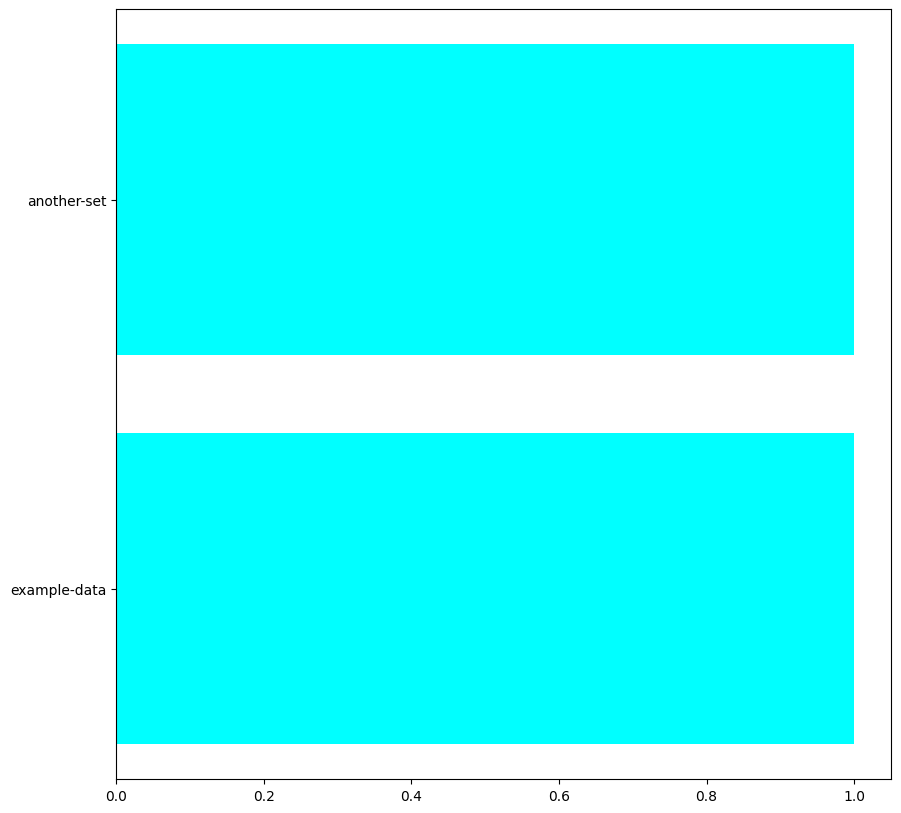

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

data_bigramf=sorted(list(count_2gramf.items()),key=operator.itemgetter(1),reverse=True)[0:20]

# join the 2 words with '-' in the middle
words = ['-'.join(x) for x, c in data_bigramf ]

# get the counts
width = [c for x, c in data_bigramf]

plt.barh(words, width, color='cyan')